# Assignment 2 - Evaluating Classification Models
MSDS 422 - SEC 57 THURSDAY

FERDYNAND HEBAL - 7/8/2019

I struggled using just the three binary explanatory variables relating to client banking history: default, housing, and loan in this assignment to predict the binary response variable: "Has the client subscribed to a term deposit?" Model results reliably returned 0 rate of prediction for logistic regression, and occasionally successful hits with naive bayes. I tried using another set of explanatory variables using this same dataset that seemed to replicate results of other analyses using the same bank.csv dataset available via a google search. Results were similary lackluster. In any case below are the result of this analysis comparing logistic regression with naive bayes using ROC curves, ROC auc, precision, recall, F1 score, and confusion matrices.

Regarding the management problem, these results suggest another approach may be more appropriate including models better suited to predicted rare events. Looking at descriptive results banking clients who do not have a loan or a house appear to be the best target for direct marketing efforts?

# Data preparation, exploration, visualization 

Below I perform light data processing per the python starter code, including removal of nulls, relabeling string columns to binary integers for the suggested variables, and applying pandas get_dummies method to obtain one hot encoded columns of another set of variables for analysis.

In [439]:
RANDOM_SEED = 1

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

#convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

data = pd.read_csv(r'bank.csv',sep=';')
data = data.dropna()
print(data.shape)
print(list(data.columns))

default = data['default'].map(convert_to_binary)
housing = data['housing'].map(convert_to_binary)
loan = data['loan'].map(convert_to_binary)
response = data['response'].map(convert_to_binary)


data['response'] = data['response'].map(convert_to_binary)

data_google = data[['job', 'marital', 'default', 'housing', 'loan', 'poutcome','response','age']]


data2 = pd.get_dummies(data_google, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])


#uncommenting this will run the variables suggested in this assignment through this model
data = pd.concat([response,default,loan,housing],axis=1)
data2 = data

data2.head()

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response']


,response,default,loan,housing
0,0,0,0,0
1,0,0,1,1
2,0,0,0,1
3,0,0,1,1
4,0,0,0,1


It is clear for the response variable that the data is imbalanced and the response rate is low ~11.5% 

In [440]:
data2.response.value_counts()

0    4000
1     521
Name: response, dtype: int64

The crosstabs below demonstrate row percentages to review any potential associatiomn of the three variables suggested for this model with the response variable. housing and loan seem to have the largest differences in row percentages comparing yes vs no in the explanatory variable vs. the response variable

In [454]:
pd.crosstab(data.response,data.housing).apply(lambda r: r/r.sum(), axis=1)

housing,0,1
response,,
0,0.415250,0.584750
1,0.577735,0.422265


In [455]:
pd.crosstab(data.response,data.default).apply(lambda r: r/r.sum(), axis=1)

default,0,1
response,,
0,0.983250,0.016750
1,0.982726,0.017274


In [456]:
pd.crosstab(data.response,data.loan).apply(lambda r: r/r.sum(), axis=1)

loan,0,1
response,,
0,0.838000,0.162000
1,0.917466,0.082534


# Review research design and modeling methods 
Splitting test and training data will help to avoid snooping bias and overfitting, I use the sklearn train_test_split function and set 20% test size. Below this, logistic regression and the naive bayes GuassianNB classifiers are compared generating a confusion matrix, precision, recall, and f1 scores, and the ROC auc

In [444]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [460]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, solver = 'liblinear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix")
print(confusion_matrix)
print()
print('Accuracy of logistic classifier on test set: {:.2f}'.format(classifier.score(X_train, y_train)))
print()
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(classifier, X_train, y_train, cv=3,
                             method="decision_function")

print('ROC auc')
print(roc_auc_score(y_train, y_scores))

Confusion Matrix
[[3207    0]
 [ 409    0]]

Accuracy of logistic classifier on test set: 0.89

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3207
           1       0.00      0.00      0.00       409

   micro avg       0.89      0.89      0.89      3616
   macro avg       0.44      0.50      0.47      3616
weighted avg       0.79      0.89      0.83      3616

ROC auc
0.6121896401743437


/Users/ferdynandhebal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [461]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix")
print(confusion_matrix)
print()
print('Accuracy of logistic classifier on test set: {:.2f}'.format(classifier.score(X_train, y_train)))
print()
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(classifier, X_train, y_train, cv=3,
                             method="predict")

print('ROC auc')
print(roc_auc_score(y_train, y_scores))

Confusion Matrix
[[3177   30]
 [ 404    5]]

Accuracy of logistic classifier on test set: 0.88

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3207
           1       0.14      0.01      0.02       409

   micro avg       0.88      0.88      0.88      3616
   macro avg       0.52      0.50      0.48      3616
weighted avg       0.80      0.88      0.83      3616

ROC auc
0.49995044458828214


# ROC curve
The receiver operating characterstic (ROC) curve, similar to the precision/recall curve, is a tool for evaluating models in predicting the intended target class in a classification problem. It is plotted as a curve of the True Positive Rate (TPR/Sensitivity) vs True Negative Rate (1-Specificity). In other words it represents the probability that a positive decision is a true positive of all possible positive targets vs the probability of returning a false positive out of all possibile negative targets. This juxtaposition helps illustrate a good model (e.g  where the increase in recall/TPR minimally increases the chance of false positives) vs a poor model (e.g. where the increase in recall drastically increased the chance of false positives). A perfect model would not generate any false positives but there is nearly always a tradeoff where the higher the recall/sensitivity (TPR) the more false positives (FPR) the classifier produces. The ROC in turn provides a measure of a model's predictive accuracy at various decision thresholds and allows for performance comparison against other models. The ROC Area Under the Curve (AUC) offers a simple score to compare classifiers using the ROC measure.

As useful as it is, it the ROC is not a perfect measure and can overestimate the predictive accuracy in cases where positives are a rare occurrence in the dataset. In this case the PR curve may reveal room for improvement in recall. The F1 score, or the harmonic mean of precision and recall give more weight to low values will tend towarda a high score only if both recall and precision are high.

This may be preferable in such cases to the ROC AUC in comparing classifiers

Below the Naive bayes ROC is flat at .5, while the logistic regression shows a slightly better curve.

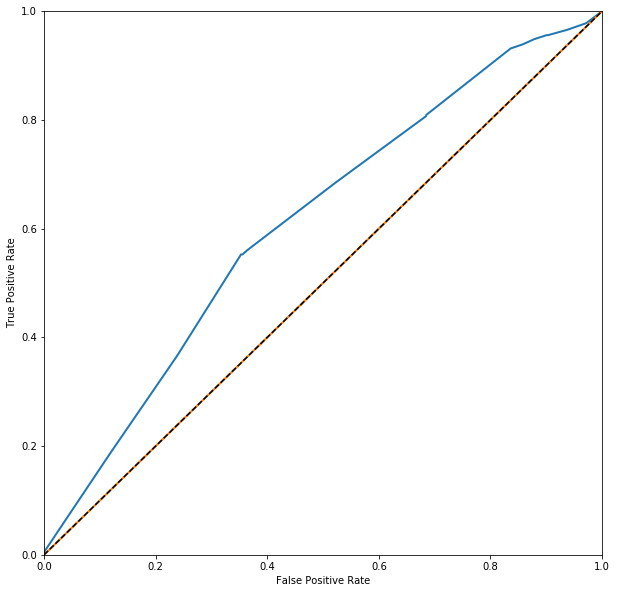

In [463]:
fig = plt.figure(figsize=(10,10))
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver = 'liblinear')
classifier.fit(X_train, y_train)

from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(classifier, X_train, y_train, cv=3,method="decision_function")

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(classifier, X_train, y_train, cv=3,method="predict")
                            
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')



plot_roc_curve(fpr, tpr)
plt.show()

# Summary

The response rate in this dataset is ~12%. It is difficult to make predictions with a rare response and perhaps would lend itself better to a model suitable for this kind of problem. Perhaps a Poisson distribution would provide a better model of rare events. Since this is an approximation of the binomial distribution it may be possible to use logistic regression given a larger dataset?

Regardless of the poor performance of the models in this assignment it is clear that the logistic regression returns decisions with a poorer recall compared with the naive bayes model. The F1 score confirms this despite a superior ROC auc in logistic regression compared with naive bayes.

Where naive bayes returns 5 true positive, logistic regression return none. Testing this with other random seeds, thresholds, and sampling sizes returns similarly poor performance results but the differences between logistic regression and naive bayes are maintained with a higher ROC in logistic regression and a higher F1 in bayes.


Regarding the management problem, these results suggest another approach may be more appropriate including models better suited to predicted rare events. Looking at descriptive results banking clients who do not have a loan or a house appear to be the best target for direct marketing efforts?